In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [21]:
user= pd.read_csv(r"C:\Users\sina\Documents\Springboard\TakeHome\relax_challenge\takehome_users.csv", encoding='ISO-8859-1')
display(user.head())
print(user.info())

user_engagement= pd.read_csv(r"C:\Users\sina\Documents\Springboard\TakeHome\relax_challenge\takehome_user_engagement.csv", 
                            index_col=['time_stamp'], parse_dates=['time_stamp'])
display(user_engagement.head())
print(user_engagement.info())

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None


,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB
None


In [11]:
print(user.isna().mean()*100)

object_id                      0.000
creation_time                  0.000
name                           0.000
email                          0.000
creation_source                0.000
last_session_creation_time    26.475
opted_in_to_mailing_list       0.000
enabled_for_marketing_drip     0.000
org_id                         0.000
invited_by_user_id            46.525
dtype: float64


#### How many unique users are in the list?

In [13]:
user.object_id.nunique()

# Therefore, each row belongs to a unique users

12000

 last_session_creation_time:   unix  timestamp  of  last  login\
 We remove the invuted_by_user column, seems to be irrelevant to the anlysis with more than 46% missing data

Defining  an  **"adopted  user"**   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven-day  period ,  identify  which  factors  predict  future  user
adoption .


In [23]:
user_engagement.visited.value_counts()
# All the values are one. So, that column can be removed

1    207917
Name: visited, dtype: int64

In [58]:
login_counts= user_engagement.groupby('user_id').resample('7D').size()
login_counts= login_counts.reset_index(name= 'counts')

In [64]:
adopted_id_list= login_counts.loc[login_counts.counts>=3]['user_id'].unique()

In [67]:
user['adopted']= np.where(user.object_id.isin(adopted_id_list), 1, 0)

In [68]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


Factors to include:\
    * creation_time: maybe month\
    * creation_source\
    * opted_in_to_mailing_list\
    * enable_for_marketing_drip

In [71]:
print(user.creation_source.value_counts(), '\n')
print(user.opted_in_to_mailing_list.value_counts(), '\n')
print(user.enabled_for_marketing_drip.value_counts())

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64 

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64 

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64


#### Create the month column

In [81]:
user['creation_time']= pd.to_datetime(user['creation_time'])
user['month']= user['creation_time'].dt.month_name()

In [100]:
# What percentage of users are adopted?
print(user.adopted.value_counts(normalize= True))

# Only 12%
# The data is moderately imbalanced

0    0.877333
1    0.122667
Name: adopted, dtype: float64


In [82]:
selected_features= ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'month']

X= user[selected_features]
y= user['adopted']

#### One-hot-encoding

In [84]:
X= pd.get_dummies(X)

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .2, random_state= 123)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

0.8633333333333333
0.5673483597911697


<AxesSubplot:>

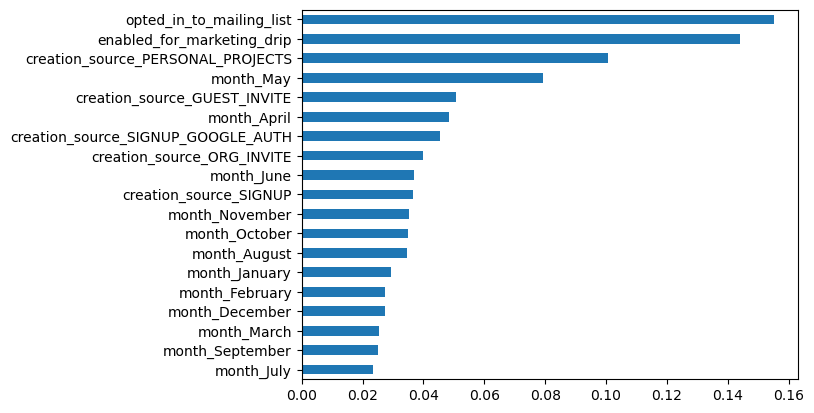

In [104]:
rf= RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
y_pred_proba= rf.predict_proba(X_test)[:,1]

print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_proba))

pd.Series(rf.feature_importances_, index= X.columns).sort_values().plot(kind= 'barh')